十分統計量

https://www.youtube.com/watch?v=O6zRQYyhiy8&list=PLoT4uZPqN2DKP7_6fWsTW9ynM7uw7w0uD&index=20

## 最尤法の概要

最尤法（さいゆうほう、Maximum Likelihood Estimation, MLE）は、統計モデルにおけるパラメータの推定法の一つです。最尤法の基本的な考え方は、観測データが最も高い確率で得られるようなパラメータを求めることです。

### 最尤法の基本概念

1. **尤度関数**:
    - 尤度関数は、観測データを得る確率をパラメータの関数として表したものです。一般に、パラメータ$\theta$の尤度関数$L(\theta)$は次のように定義されます。
    $$
    L(\theta) = P(X_1 = x_1, X_2 = x_2, \ldots, X_n = x_n | \theta)
    $$
    ここで、$X_i$は観測データで、$x_i$はその観測値です。

2. **対数尤度関数**:
    - 計算の簡便さのために、尤度関数の対数をとった対数尤度関数を用いることが多いです。対数尤度関数$l(\theta)$は次のように定義されます。
    $$
    l(\theta) = \log L(\theta)
    $$

3. **最尤推定量**:
    - 最尤推定量$\hat{\theta}$は、対数尤度関数を最大化するパラメータです。つまり、次の条件を満たす$\hat{\theta}$を求めます。
    $$
    \hat{\theta} = \arg\max_{\theta} l(\theta)
    $$

### 例：正規分布の最尤推定

正規分布$N(\mu, \sigma^2)$に従う独立な観測データ$X_1, X_2, \ldots, X_n$があるとします。この場合のパラメータは$\mu$と$\sigma^2$です。

1. **尤度関数**:
    - 尤度関数$L(\mu, \sigma^2)$は次のように表されます。
    $$
    L(\mu, \sigma^2) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
    $$

2. **対数尤度関数**:
    - 対数尤度関数$l(\mu, \sigma^2)$は次のようになります。
    $$
    l(\mu, \sigma^2) = \log L(\mu, \sigma^2) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2
    $$

3. **最尤推定量の導出**:
    - 対数尤度関数を$\mu$と$\sigma^2$で偏微分して、それぞれを0に等しくします。これにより、最尤推定量$\hat{\mu}$と$\hat{\sigma}^2$が求められます。
    - $\mu$に関する微分:
      $$
      \frac{\partial l(\mu, \sigma^2)}{\partial \mu} = \frac{1}{\sigma^2} \sum_{i=1}^n (x_i - \mu) = 0
      $$
      これを解くと、
      $$
      \hat{\mu} = \frac{1}{n} \sum_{i=1}^n x_i
      $$
    - $\sigma^2$に関する微分:
      $$
      \frac{\partial l(\mu, \sigma^2)}{\partial \sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^n (x_i - \mu)^2 = 0
      $$
      これを解くと、
      $$
      \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \hat{\mu})^2
      $$

以上が、正規分布のパラメータ$\mu$と$\sigma^2$の最尤推定です。

### Pythonによる実装

以下に、正規分布の最尤推定を行うPythonコードを示します。



In [1]:
import numpy as np

# サンプルデータ
data = np.array([1.2, 2.3, 3.1, 4.5, 5.9])

# 平均（mu）の最尤推定量
mu_mle = np.mean(data)

# 分散（sigma^2）の最尤推定量
sigma2_mle = np.var(data, ddof=0)

print(f'MLE of mu: {mu_mle}')
print(f'MLE of sigma^2: {sigma2_mle}')


MLE of mu: 3.4
MLE of sigma^2: 2.7200000000000006


## 対数尤度関数の導出

ここでは、正規分布$N(\mu, \sigma^2)$に従う独立な観測データ$X_1, X_2, \ldots, X_n$の対数尤度関数の導出を行います。正規分布の確率密度関数（PDF）は以下の通りです：

$$
f(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

### 尤度関数

観測データ$X_1, X_2, \ldots, X_n$が独立に同じ正規分布に従う場合、尤度関数$L(\mu, \sigma^2)$は次のようになります：

$$
L(\mu, \sigma^2) = \prod_{i=1}^n f(x_i|\mu, \sigma^2) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

### 尤度関数の対数

対数尤度関数$l(\mu, \sigma^2)$は尤度関数$L(\mu, \sigma^2)$の対数を取ったものです。計算の簡便さのため、対数を取ると積の形が和の形になります。

$$
l(\mu, \sigma^2) = \log L(\mu, \sigma^2) = \log \left( \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) \right)
$$

### 対数の性質を利用

対数の性質を利用して、積の対数を和に変換します。

$$
l(\mu, \sigma^2) = \sum_{i=1}^n \log \left( \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) \right)
$$

さらに、対数の性質により、分けて書くことができます。

$$
l(\mu, \sigma^2) = \sum_{i=1}^n \left[ \log \left( \frac{1}{\sqrt{2\pi\sigma^2}} \right) + \log \left( \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) \right) \right]
$$

対数と指数関数の性質を用いて簡略化します。

$$
l(\mu, \sigma^2) = \sum_{i=1}^n \left[ -\frac{1}{2} \log(2\pi\sigma^2) - \frac{(x_i - \mu)^2}{2\sigma^2} \right]
$$

この式をさらに整理すると：

$$
l(\mu, \sigma^2) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2
$$

これが正規分布に対する対数尤度関数の導出結果です。

## モーメント法の詳細

モーメント法（Method of Moments）は、統計モデルのパラメータ推定法の一つで、データから得られる標本モーメントと理論的な母集団モーメントを一致させることでパラメータを推定します。以下にその詳細を説明します。

### モーメント法の基本概念

モーメント法では、次の手順を経てパラメータを推定します。

1. **標本モーメントの計算**：
    - 標本モーメントはデータから直接計算される統計量です。$k$次の標本モーメント$\hat{\mu}_k$は次のように計算されます。
    $$
    \hat{\mu}_k = \frac{1}{n} \sum_{i=1}^n X_i^k
    $$
    ここで、$X_i$はデータの$i$番目の観測値、$n$はデータの総数です。

2. **理論モーメントの設定**：
    - 理論モーメントは、確率分布のパラメータに依存する数式で表されます。例えば、正規分布$N(\mu, \sigma^2)$の一次モーメント（平均）は$\mu$、二次モーメントは$\mu^2 + \sigma^2$です。

3. **モーメントの一致**：
    - 標本モーメントと理論モーメントを一致させることで、未知のパラメータを推定します。例えば、$k$次の標本モーメント$\hat{\mu}_k$を理論モーメント$\mu_k$に等しいとします。
    $$
    \hat{\mu}_k = \mu_k
    $$

### 例：正規分布のパラメータ推定

ここでは、正規分布$N(\mu, \sigma^2)$のパラメータ$\mu$と$\sigma^2$をモーメント法で推定する例を示します。

#### 1. 一次モーメント（平均）

正規分布の一次モーメント（平均）は$\mu$です。標本平均$\hat{\mu}$を計算し、これを母集団の平均$\mu$に一致させます。

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^n X_i
$$

#### 2. 二次モーメント（分散）

正規分布の二次モーメントは$\mu^2 + \sigma^2$です。標本の二次モーメント$\hat{\mu}_2$を計算し、これを理論モーメントに一致させます。

標本の二次モーメント$\hat{\mu}_2$は次のように計算されます。

$$
\hat{\mu}_2 = \frac{1}{n} \sum_{i=1}^n X_i^2
$$

理論モーメント$\mu_2$は$\mu^2 + \sigma^2$です。これを用いて、次の方程式を立てます。

$$
\hat{\mu}_2 = \mu^2 + \sigma^2
$$

これを解くことで、分散$\sigma^2$を推定します。

$$
\hat{\sigma}^2 = \hat{\mu}_2 - \hat{\mu}^2
$$

### 手順のまとめ

1. **標本モーメントの計算**：
    - 各次の標本モーメントを計算します。例えば、一次モーメント（標本平均）と二次モーメントなど。

2. **理論モーメントの表現**：
    - 確率分布に基づく理論モーメントを設定します。

3. **方程式の設定**：
    - 標本モーメントと理論モーメントを一致させる方程式を立てます。

4. **パラメータの推定**：
    - 上記の方程式を解いて、パラメータを推定します。

### Pythonでの実装例

以下に、正規分布のパラメータ$\mu$と$\sigma^2$をモーメント法で推定するPythonコードを示します。

In [2]:
import numpy as np

# サンプルデータ
data = np.array([1.2, 2.3, 3.1, 4.5, 5.9])

# 一次モーメント（平均）の推定
mu_mom = np.mean(data)

# 二次モーメントの推定
mu2_mom = np.mean(data**2)

# 分散の推定
sigma2_mom = mu2_mom - mu_mom**2

print(f'MOM of mu: {mu_mom}')
print(f'MOM of sigma^2: {sigma2_mom}')

MOM of mu: 3.4
MOM of sigma^2: 2.7200000000000024


## 不偏推定量とは

不偏推定量（ふへんすいていりょう、Unbiased Estimator）とは、統計学において母集団のパラメータを推定するために使用される推定量の一種で、その期待値が真の母集団パラメータに一致するものを指します。具体的には、推定量の期待値が推定しようとする母集団パラメータと等しい場合、その推定量は不偏であると言います。

### 定義

確率変数 $X_1, X_2, \ldots, X_n$ が母集団からの無作為標本であり、母集団パラメータ $\theta$ を推定するための推定量 $\hat{\theta}$ が不偏であるとは、次の条件を満たすことを意味します：

$$
\mathbb{E}[\hat{\theta}] = \theta
$$

ここで、$\mathbb{E}[\hat{\theta}]$ は $\hat{\theta}$ の期待値を示します。

### 例：平均の不偏推定量

母集団の平均 $\mu$ を推定するための不偏推定量として、標本平均 $\bar{X}$ が一般的に使用されます。標本平均 $\bar{X}$ は次のように定義されます：

$$
\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i
$$

このとき、$\bar{X}$ の期待値は母集団の平均 $\mu$ に等しいため、$\bar{X}$ は $\mu$ の不偏推定量となります。

$$
\mathbb{E}[\bar{X}] = \mu
$$

### 例：分散の不偏推定量

母集団の分散 $\sigma^2$ を推定するための不偏推定量として、次のような標本分散 $s^2$ が使用されます：

$$
s^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2
$$

このとき、$s^2$ の期待値は母集団の分散 $\sigma^2$ に等しいため、$s^2$ は $\sigma^2$ の不偏推定量となります。

$$
\mathbb{E}[s^2] = \sigma^2
$$

標本分散が $\frac{1}{n-1}$ で割られているのは、不偏性を保つためです。もし $\frac{1}{n}$ で割ると期待値が母集団分散よりも小さくなってしまい、不偏推定量とはなりません。

### 不偏推定量の重要性

不偏推定量は、長期的に見た場合に推定値が偏らないことを保証するため、統計解析において重要な概念です。不偏性を持つ推定量を使用することで、推定結果が母集団の真のパラメータに対して一貫性を持つことが期待されます。

### Pythonでの実装例

標本平均と標本分散を計算するPythonコードの例を示します。




このコードでは、標本平均と不偏標本分散を計算しています。`np.var` 関数の `ddof=1` 引数は、分母に $(n-1)$ を使用することで不偏推定量を得るために指定されています。

不偏推定量は統計解析の精度を高めるために重要な概念であり、実際のデータ分析においても頻繁に使用されます。

In [3]:

import numpy as np

# サンプルデータ
data = np.array([1.2, 2.3, 3.1, 4.5, 5.9])

# 標本平均の計算
sample_mean = np.mean(data)

# 不偏標本分散の計算
sample_variance_unbiased = np.var(data, ddof=1)

print(f'Sample Mean (Unbiased Estimator of Mean): {sample_mean}')
print(f'Sample Variance (Unbiased Estimator of Variance): {sample_variance_unbiased}')

Sample Mean (Unbiased Estimator of Mean): 3.4
Sample Variance (Unbiased Estimator of Variance): 3.400000000000001


## 不偏推定量でない例

不偏推定量でない推定量とは、その期待値が推定対象の母集団パラメータと一致しない推定量です。ここでは、不偏推定量でない例として、母集団分散の推定に用いられる「標本分散の不偏推定量でない例」を取り上げます。

### 標本分散の不偏推定量でない例

母集団分散 $\sigma^2$ を推定するために用いられる標本分散には、不偏推定量と不偏推定量でないものがあります。

#### 1. 標本分散（不偏推定量でない）

不偏推定量でない標本分散 $s_n^2$ は、次のように計算されます：

$$
s_n^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \bar{X})^2
$$

ここで、$X_i$ は標本データの $i$ 番目の観測値、$\bar{X}$ は標本平均、$n$ は標本サイズです。この標本分散の期待値は母集団分散 $\sigma^2$ に一致しません。

具体的には、期待値は次のようになります：

$$
\mathbb{E}[s_n^2] = \frac{n-1}{n} \sigma^2
$$

このため、$s_n^2$ は母集団分散 $\sigma^2$ の不偏推定量ではありません。

### 2. 不偏標本分散（不偏推定量）

参考までに、不偏推定量である標本分散 $s^2$ は次のように計算されます：

$$
s^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2
$$

この場合、期待値は母集団分散 $\sigma^2$ に一致します：

$$
\mathbb{E}[s^2] = \sigma^2
$$



## バイアス・バリアンス分解について

バイアス・バリアンス分解（Bias-Variance Decomposition）は、統計モデルの誤差（期待損失）を理解し、モデルの性能を評価するための概念です。モデルの誤差をバイアス（偏り）とバリアンス（分散）の2つの要素に分解することで、モデルの予測能力や過学習・過少学習の特性を分析することができます。

### モデルの誤差の分解

モデルの予測誤差（平均二乗誤差）は、次の3つの要素に分解されます：

1. **バイアス（偏り）**：モデルの予測値と真の値の差の期待値。
2. **バリアンス（分散）**：モデルの予測値のばらつき。
3. **ノイズ（誤差の分散）**：データの固有のランダムな誤差。

#### 数式による表現

まず、$Y$ を予測対象の真の値、$X$ を説明変数、$\hat{f}(X)$ をモデルの予測値とします。予測誤差（期待損失）は次のように表されます：

$$
\mathbb{E}\left[(Y - \hat{f}(X))^2\right]
$$

この予測誤差を以下のように分解できます：

$$
\mathbb{E}\left[(Y - \hat{f}(X))^2\right] = (\text{Bias}[\hat{f}(X)])^2 + \text{Var}[\hat{f}(X)] + \sigma^2
$$

ここで、

- $\text{Bias}[\hat{f}(X)] = \mathbb{E}[\hat{f}(X)] - f(X)$ はバイアス（モデルの期待値と真の関数$f(X)$との差）。
- $\text{Var}[\hat{f}(X)] = \mathbb{E}[(\hat{f}(X) - \mathbb{E}[\hat{f}(X)])^2]$ はバリアンス（モデルの予測のばらつき）。
- $\sigma^2$ はノイズ（観測値のばらつき）。

### バイアスとバリアンスのトレードオフ

- **バイアスが高い**：モデルが真の関数をうまく捕捉できていない状態（過少学習）。例えば、線形回帰モデルが非線形データをフィットする場合。
- **バリアンスが高い**：モデルがデータに対して過剰にフィットしている状態（過学習）。例えば、高次の多項式回帰モデルが少数のデータポイントをフィットする場合。

#### 適切なバランス

理想的なモデルは、バイアスとバリアンスのバランスが取れた状態にあります。過少学習を避けるためにバイアスを低くし、過学習を避けるためにバリアンスを低く保つことが求められます。

### 図解

以下に、バイアスとバリアンスのトレードオフを示す図をPythonで描画する例を示します。



このコードは、モデルの複雑さに応じたバイアスとバリアンスの変化を視覚的に示しています。一般に、モデルの複雑さが増すとバイアスは減少し、バリアンスは増加します。最適なモデルの複雑さは、これらのトレードオフを考慮して決定されます。

### まとめ

バイアス・バリアンス分解は、モデルの予測誤差をバイアス、バリアンス、およびノイズの3つの要素に分解することで、モデルの性能を評価し、過学習や過少学習の特性を理解するための重要な概念です。この分解を用いることで、モデルの選択やチューニングにおいて、バイアスとバリアンスのバランスを考慮することができます。

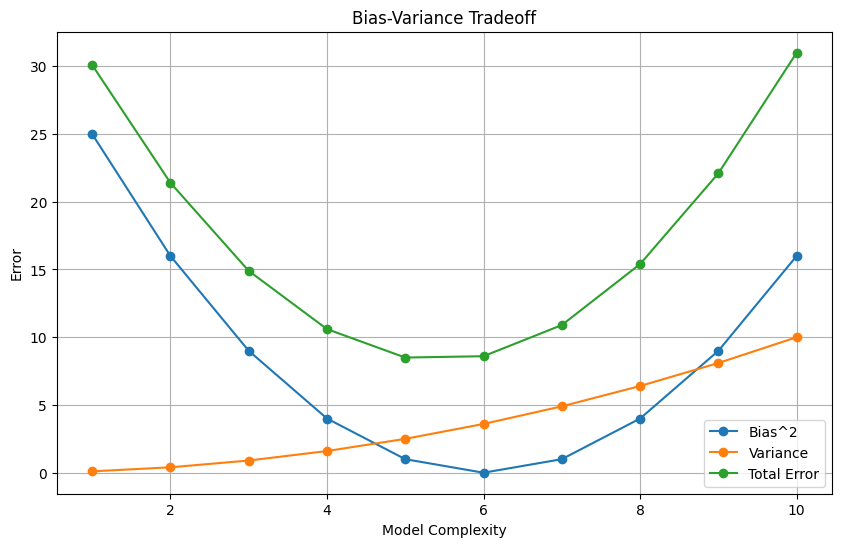

In [4]:


import numpy as np
import matplotlib.pyplot as plt

# バイアスとバリアンスの関係を示すためのデータ生成
model_complexity = np.arange(1, 11)
bias2 = (model_complexity - 6)**2
variance = model_complexity**2 / 10
error = bias2 + variance + 5  # ノイズ成分を含めた誤差

plt.figure(figsize=(10, 6))
plt.plot(model_complexity, bias2, label='Bias^2', marker='o')
plt.plot(model_complexity, variance, label='Variance', marker='o')
plt.plot(model_complexity, error, label='Total Error', marker='o')
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
plt.show()

## 一様最小分散不偏推定量とは

一様最小分散不偏推定量（Uniformly Minimum Variance Unbiased Estimator, UMVUE）とは、不偏推定量の中でも最も分散が小さい推定量のことです。UMVUEは、全ての不偏推定量の中で最も効率的な推定量と言えます。

### 定義

推定量 $\hat{\theta}$ が母集団パラメータ $\theta$ の不偏推定量である場合、その期待値は次の条件を満たします：

$$
\mathbb{E}[\hat{\theta}] = \theta
$$

このような不偏推定量の中で、分散が最も小さいものを一様最小分散不偏推定量（UMVUE）と呼びます。すなわち、UMVUEは次の条件を満たす不偏推定量 $\hat{\theta}$ です：

$$
\forall \text{不偏推定量} \, \hat{\theta'} \, , \quad \text{Var}(\hat{\theta}) \leq \text{Var}(\hat{\theta'})
$$

### 例：正規分布におけるUMVUE

正規分布 $N(\mu, \sigma^2)$ における母集団平均 $\mu$ と母集団分散 $\sigma^2$ のUMVUEを具体例として説明します。

#### 1. 母集団平均 $\mu$ のUMVUE

標本平均 $\bar{X}$ は母集団平均 $\mu$ の不偏推定量であり、最小分散を持ちます。標本平均 $\bar{X}$ は次のように定義されます：

$$
\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i
$$

この標本平均 $\bar{X}$ は次の性質を持ちます：

$$
\mathbb{E}[\bar{X}] = \mu \quad \text{（不偏性）}
$$

また、その分散は次の通りです：

$$
\text{Var}(\bar{X}) = \frac{\sigma^2}{n}
$$

したがって、$\bar{X}$ は $\mu$ のUMVUEです。

#### 2. 母集団分散 $\sigma^2$ のUMVUE

標本分散 $s^2$ は母集団分散 $\sigma^2$ の不偏推定量です：

$$
s^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2
$$

この標本分散 $s^2$ は次の性質を持ちます：

$$
\mathbb{E}[s^2] = \sigma^2 \quad \text{（不偏性）}
$$

また、その分散は最小です。したがって、$s^2$ は $\sigma^2$ のUMVUEです。

### 統計的推定におけるUMVUEの重要性

UMVUEは、以下の理由から統計的推定において非常に重要です：

1. **効率性**：UMVUEは不偏推定量の中で最も分散が小さいため、推定値のばらつきが最小限に抑えられます。これにより、より精度の高い推定が可能となります。
2. **一貫性**：UMVUEは常に最小の分散を持つため、どのサンプルに対しても効率的な推定を行うことができます。

### PythonでのUMVUEの例

以下に、正規分布における母集団平均 $\mu$ と母集団分散 $\sigma^2$ のUMVUEを計算するPythonコードの例を示します。

```python
import numpy as np

# サンプルデータ
data = np.array([1.2, 2.3, 3.1, 4.5, 5.9])

# 標本平均（母集団平均のUMVUE）
sample_mean = np.mean(data)

# 不偏標本分散（母集団分散のUMVUE）
sample_variance_unbiased = np.var(data, ddof=1)

print(f'Sample Mean (UMVUE of Mean): {sample_mean}')
print(f'Unbiased Sample Variance (UMVUE of Variance): {sample_variance_unbiased}')
```

このコードでは、標本平均と不偏標本分散を計算しています。これらは、それぞれ母集団平均 $\mu$ と母集団分散 $\sigma^2$ のUMVUEです。

### まとめ

一様最小分散不偏推定量（UMVUE）は、不偏推定量の中でも最も分散が小さい推定量です。UMVUEは効率的かつ一貫した推定を行うため、統計解析において非常に重要な役割を果たします。具体例として、正規分布における母集団平均のUMVUEは標本平均であり、母集団分散のUMVUEは不偏標本分散です。

## ガウス・マルコフの定理について

ガウス・マルコフの定理（Gauss-Markov theorem）は、線形回帰モデルにおいて、最小二乗推定量がどのような条件の下で最良の推定量であるかを示す定理です。この定理は、最小二乗法による推定量が一様最小分散不偏推定量（UMVUE）であることを保証します。

### ガウス・マルコフの定理の内容

ガウス・マルコフの定理は次のように述べられます：

**線形回帰モデル**：
$$
Y = X\beta + \epsilon
$$

ここで、
- $Y$ は $n \times 1$ の観測値ベクトル、
- $X$ は $n \times p$ の設計行列、
- $\beta$ は $p \times 1$ の回帰係数ベクトル、
- $\epsilon$ は $n \times 1$ の誤差項ベクトル。

**条件**：
1. **線形性**：モデルは線形である。
2. **誤差の期待値**：誤差項の期待値はゼロである。
   $$
   \mathbb{E}[\epsilon] = 0
   $$
3. **誤差の等分散性**：誤差項の分散は一定である（同分散性）。
   $$
   \text{Var}(\epsilon) = \sigma^2 I_n
   $$
   ここで、$I_n$ は $n \times n$ の単位行列。
4. **誤差の無相関**：誤差項は互いに無相関である。
   $$
   \text{Cov}(\epsilon_i, \epsilon_j) = 0 \quad \text{for } i \neq j
   $$

**結論**：
これらの条件が満たされる場合、最小二乗推定量 $\hat{\beta}_{OLS}$ は $\beta$ の一様最小分散不偏推定量（UMVUE）である。すなわち、$\hat{\beta}_{OLS}$ は次の条件を満たす：

$$
\hat{\beta}_{OLS} = (X^T X)^{-1} X^T Y
$$

$\hat{\beta}_{OLS}$ は全ての線形不偏推定量の中で最も分散が小さい。

### ガウス・マルコフの定理の重要性

この定理の重要性は、線形回帰モデルにおける最小二乗法の有効性を理論的に保証する点にあります。最小二乗推定量が最良の推定量であるため、実務的にも多くの統計解析や機械学習の手法で広く使用されています。

### 例：単回帰モデル

単回帰モデルを例にして、ガウス・マルコフの定理を具体的に見てみます。単回帰モデルは次のように表されます：

$$
Y = \beta_0 + \beta_1 X + \epsilon
$$

ここで、
- $Y$ は従属変数、
- $X$ は独立変数、
- $\beta_0$ は切片、
- $\beta_1$ は傾き、
- $\epsilon$ は誤差項。

最小二乗法により、回帰係数 $\beta_0$ と $\beta_1$ を次のように推定します：

$$
\hat{\beta}_1 = \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^n (X_i - \bar{X})^2}
$$

$$
\hat{\beta}_0 = \bar{Y} - \hat{\beta}_1 \bar{X}
$$

ここで、$\bar{X}$ と $\bar{Y}$ はそれぞれ独立変数と従属変数の平均値です。

### Pythonによる単回帰モデルの実装例

以下に、単回帰モデルをPythonで実装する例を示します。



このコードでは、`statsmodels`ライブラリを使用して単回帰モデルを適用し、最小二乗法による回帰係数を求めています。

### まとめ

ガウス・マルコフの定理は、線形回帰モデルにおいて最小二乗推定量が最も効率的な不偏推定量であることを保証します。この定理により、最小二乗法の有効性が理論的に裏付けられ、実務で広く使用される理由が説明されます。

In [6]:

import numpy as np
import statsmodels.api as sm

# サンプルデータ
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 3, 5, 7, 11])

# 定数項を含めるためにXに1を追加
X = sm.add_constant(X)

# 最小二乗法による回帰モデルの適用
model = sm.OLS(Y, X)
results = model.fit()

# 回帰係数の表示
print(f'Intercept (β0): {results.params[0]}')
print(f'Slope (β1): {results.params[1]}')


Intercept (β0): -0.9999999999999969
Slope (β1): 2.1999999999999997


## クラーメル・ラオの不等式とフィッシャー情報量について

クラーメル・ラオの不等式（Cramér-Rao Inequality）とフィッシャー情報量（Fisher Information）は、統計学におけるパラメータ推定の理論的基盤となる重要な概念です。以下にそれぞれの詳細と相互の関係について説明します。

### クラーメル・ラオの不等式

クラーメル・ラオの不等式は、任意の不偏推定量の分散の下限を与える不等式です。この不等式により、あるパラメータ推定の最良の可能な精度（分散の下限）を知ることができます。

#### 定義

確率変数 $X$ がパラメータ $\theta$ に依存する確率密度関数（または確率質量関数） $f(x|\theta)$ に従うとします。このとき、パラメータ $\theta$ の不偏推定量 $\hat{\theta}$ に対して次の不等式が成り立ちます：

$$
\text{Var}(\hat{\theta}) \geq \frac{1}{I(\theta)}
$$

ここで、$I(\theta)$ はフィッシャー情報量と呼ばれます。

### フィッシャー情報量

フィッシャー情報量は、データがどれだけの情報を持っているかを表す尺度であり、推定の精度に直接関連します。

#### 定義

フィッシャー情報量 $I(\theta)$ は次のように定義されます：

$$
I(\theta) = \mathbb{E}\left[\left(\frac{\partial \log f(X|\theta)}{\partial \theta}\right)^2\right]
$$

ここで、$\log f(X|\theta)$ は $X$ の対数尤度関数です。

### クラーメル・ラオの不等式の詳細

クラーメル・ラオの不等式は、フィッシャー情報量を用いて不偏推定量の分散の下限を与えます。この不等式の重要性は、次の点にあります：

1. **理論的限界**：任意の不偏推定量が持ちうる最小の分散を示すため、推定方法の性能を評価する基準となります。
2. **効率的推定量**：推定量がクラーメル・ラオの下限に達している場合、その推定量は効率的（分散が最小）であると言います。

### クラーメル・ラオの不等式の導出

クラーメル・ラオの不等式の導出は、以下の手順で行われます：

1. **対数尤度関数の導関数**：対数尤度関数 $\ell(\theta) = \log f(X|\theta)$ を $\theta$ で偏微分します。
2. **スコア関数**：スコア関数 $U(\theta)$ を次のように定義します：
   $$
   U(\theta) = \frac{\partial \ell(\theta)}{\partial \theta}
   $$
3. **フィッシャー情報量**：フィッシャー情報量は、スコア関数の二乗の期待値として定義されます：
   $$
   I(\theta) = \mathbb{E}\left[U(\theta)^2\right]
   $$
4. **分散の下限**：不偏推定量 $\hat{\theta}$ の分散は次のように評価されます：
   $$
   \text{Var}(\hat{\theta}) \geq \frac{1}{I(\theta)}
   $$

### 例：正規分布のフィッシャー情報量とクラーメル・ラオの不等式

正規分布 $N(\mu, \sigma^2)$ に対するフィッシャー情報量とクラーメル・ラオの不等式を考えます。

#### 正規分布のフィッシャー情報量

正規分布 $N(\mu, \sigma^2)$ の場合、$\mu$ に関するフィッシャー情報量 $I(\mu)$ は次のように計算されます：

$$
I(\mu) = \frac{n}{\sigma^2}
$$

ここで、$n$ は観測数です。

#### クラーメル・ラオの不等式

この場合のクラーメル・ラオの不等式は次のようになります：

$$
\text{Var}(\hat{\mu}) \geq \frac{\sigma^2}{n}
$$

この不等式から、標本平均 $\bar{X}$ が $\mu$ の最小分散不偏推定量であることが確認できます。

### Pythonによる例の実装

正規分布に対するフィッシャー情報量とクラーメル・ラオの不等式の実装例を示します。





このコードでは、正規分布のデータを生成し、標本平均、標本分散、フィッシャー情報量、クラーメル・ラオの下限を計算しています。

### まとめ

クラーメル・ラオの不等式とフィッシャー情報量は、統計学におけるパラメータ推定の性能を評価するための重要な理論的ツールです。クラーメル・ラオの不等式は、不偏推定量の分散の下限を示し、フィッシャー情報量はデータが持つ情報の量を表します。これらの概念を理解することで、より効率的な推定方法を設計し、推定の精度を評価することができます。

In [7]:
import numpy as np

# サンプルデータ
data = np.random.normal(loc=5.0, scale=2.0, size=100)  # 平均5、標準偏差2、サイズ100のデータ生成

# 標本平均の計算
sample_mean = np.mean(data)

# 標本分散の計算
sample_variance = np.var(data, ddof=1)

# フィッシャー情報量の計算
n = len(data)
sigma2 = sample_variance
fisher_information = n / sigma2

# クラーメル・ラオの下限
cr_lower_bound = sigma2 / n

print(f'Sample Mean: {sample_mean}')
print(f'Sample Variance: {sample_variance}')
print(f'Fisher Information: {fisher_information}')
print(f'Cramér-Rao Lower Bound: {cr_lower_bound}')

Sample Mean: 4.883753242834658
Sample Variance: 3.4912900482692124
Fisher Information: 28.6427076001819
Cramér-Rao Lower Bound: 0.034912900482692126


## 有効推定量（Efficient Estimator）について

有効推定量（Efficient Estimator）は、クラーメル・ラオの不等式やフィッシャー情報量と密接に関連した概念です。有効推定量は、特定の条件下で最も効率的な（つまり、最小分散の）推定量を指します。

### 有効推定量の定義

あるパラメータ $\theta$ の推定量 $\hat{\theta}$ が有効推定量であるための条件は次の通りです：

1. **不偏性**：推定量 $\hat{\theta}$ が不偏であること。
   $$
   \mathbb{E}[\hat{\theta}] = \theta
   $$
2. **最小分散**：不偏推定量の中で分散が最小であること。

具体的には、クラーメル・ラオの下限を達成する推定量が有効推定量と呼ばれます。

### クラーメル・ラオの不等式の復習

クラーメル・ラオの不等式は次のように表されました：

$$
\text{Var}(\hat{\theta}) \geq \frac{1}{I(\theta)}
$$

ここで、$I(\theta)$ はフィッシャー情報量です。したがって、有効推定量 $\hat{\theta}_{\text{eff}}$ は次の条件を満たします：

$$
\text{Var}(\hat{\theta}_{\text{eff}}) = \frac{1}{I(\theta)}
$$

### 有効推定量の例：正規分布

正規分布 $N(\mu, \sigma^2)$ における母集団平均 $\mu$ と母集団分散 $\sigma^2$ の有効推定量を具体例として説明します。

#### 1. 母集団平均 $\mu$ の有効推定量

正規分布の母集団平均 $\mu$ の有効推定量は、標本平均 $\bar{X}$ です。標本平均 $\bar{X}$ は次のように定義されます：

$$
\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i
$$

この標本平均 $\bar{X}$ は不偏であり、分散は次の通りです：

$$
\text{Var}(\bar{X}) = \frac{\sigma^2}{n}
$$

フィッシャー情報量 $I(\mu)$ は $\frac{n}{\sigma^2}$ であるため、クラーメル・ラオの下限は $\frac{\sigma^2}{n}$ です。したがって、標本平均 $\bar{X}$ は $\mu$ の有効推定量です。

#### 2. 母集団分散 $\sigma^2$ の有効推定量

正規分布の母集団分散 $\sigma^2$ の有効推定量は、不偏標本分散 $s^2$ です。不偏標本分散 $s^2$ は次のように定義されます：

$$
s^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2
$$

この不偏標本分散 $s^2$ は不偏であり、その分散も最小であるため、$\sigma^2$ の有効推定量です。

### 有効推定量の重要性

有効推定量の重要性は以下の点にあります：

1. **効率性**：有効推定量は不偏推定量の中で最小の分散を持つため、最も精度の高い推定を行います。
2. **理論的基盤**：クラーメル・ラオの不等式を達成することで、その推定量が理論的に最良であることを保証します。
3. **実務的応用**：有効推定量は、多くの統計モデルやデータ解析手法において標準的な推定量として用いられます。


### まとめ

有効推定量は、不偏推定量の中でも最小の分散を持つ推定量です。クラーメル・ラオの不等式により、その分散の下限が決まります。フィッシャー情報量を用いることで、有効推定量が理論的に最も効率的な推定方法であることが保証されます。これにより、有効推定量は統計解析やデータ解析において重要な役割を果たします。

## 十分統計量とは

十分統計量（Sufficient Statistic）は、統計学においてデータの要約に関する概念の一つであり、データ全体の情報を効率的に集約してパラメータの推定を行うために使用されます。十分統計量は、母集団のパラメータに関する情報を完全に保持する統計量です。

### 十分統計量の定義

確率変数 $X$ の観測値から得られる統計量 $T(X)$ が、パラメータ $\theta$ の十分統計量であるとは、観測データ $X$ の条件付き分布が $T(X)$ のみに依存し、$\theta$ に依存しない場合を言います。形式的には次のように定義されます：

$$
f_{X|\theta}(X|\theta) = g(T(X)|\theta) h(X)
$$

ここで、
- $f_{X|\theta}(X|\theta)$ は観測データ $X$ の確率密度関数または確率質量関数。
- $g(T(X)|\theta)$ は $T(X)$ のみを通じて $\theta$ に依存する関数。
- $h(X)$ は $\theta$ に依存しない関数。

### 十分統計量の例

#### 1. 正規分布の平均と分散の推定

正規分布 $N(\mu, \sigma^2)$ に従う独立な観測値 $X_1, X_2, \ldots, X_n$ の場合、標本平均 $\bar{X}$ と標本分散 $S^2$ は、それぞれ母集団の平均 $\mu$ と分散 $\sigma^2$ の十分統計量です。

- 標本平均 $\bar{X}$ は $\mu$ の十分統計量：
  $$
  \bar{X} = \frac{1}{n} \sum_{i=1}^n X_i
  $$
- 標本分散 $S^2$ は $\sigma^2$ の十分統計量：
  $$
  S^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \bar{X})^2
  $$

#### 2. ベルヌーイ分布の推定

ベルヌーイ分布 $B(\theta)$ に従う独立な観測値 $X_1, X_2, \ldots, X_n$ の場合、観測データの和 $T = \sum_{i=1}^n X_i$ は、母集団の成功確率 $\theta$ の十分統計量です。

### 因子分解定理

因子分解定理（Factorization Theorem）は、統計量が十分統計量であるかどうかを判断するための便利なツールです。この定理によると、統計量 $T(X)$ がパラメータ $\theta$ の十分統計量であるための必要十分条件は、確率密度関数 $f(X|\theta)$ が次の形式で表されることです：

$$
f(X|\theta) = g(T(X)|\theta) h(X)
$$

ここで、$g$ は $T(X)$ と $\theta$ に依存する関数、$h$ は $X$ のみに依存する関数です。

### 十分統計量の重要性

1. **データの要約**：十分統計量は、データの要約として効率的にパラメータの推定を行うために重要です。十分統計量があれば、元のデータ全体を保持しなくても、パラメータ推定に必要な情報を失わずに済みます。
2. **効率性**：十分統計量を用いることで、推定の計算効率が向上し、データの管理が容易になります。
3. **情報の保持**：十分統計量は、元のデータの情報を完全に保持するため、推定の精度を最大限に保ちます。


### まとめ

十分統計量は、データ全体の情報を効率的に要約し、パラメータ推定に必要な情報を完全に保持する統計量です。因子分解定理を用いることで、統計量が十分統計量であるかを判断することができます。十分統計量を利用することで、データ解析の効率性と精度が向上します。